# Simple example of integrating the Rubidium wavefunction

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.DEBUG)

In [2]:
n = 130
l = n - 1
j = l + 0.5

In [3]:
atom = RydbergState("Rb", n=n, l=l, j=j)
atom.integrate_wavefunction()

DEBUG database.py: No model potential parameters found for Rb with L=129, trying largest L
DEBUG database.py: No Rydberg-Ritz parameters found for Rb with L=129 and J=129, trying largest L and J


In [4]:
hydrogen = RydbergState("H", n=atom.n, l=atom.l, j=atom.j)
hydrogen.create_model(add_spin_orbit=False)
hydrogen.integrate_wavefunction()

DEBUG database.py: No model potential parameters found for H with L=129, trying largest L
DEBUG database.py: No Rydberg-Ritz parameters found for H with L=129 and J=129, trying largest L and J


turning points:  {'hydrogen': 119.74680359630905, 'classical': 124.16900000000001, 'zerocrossing': 91.57000000000001}


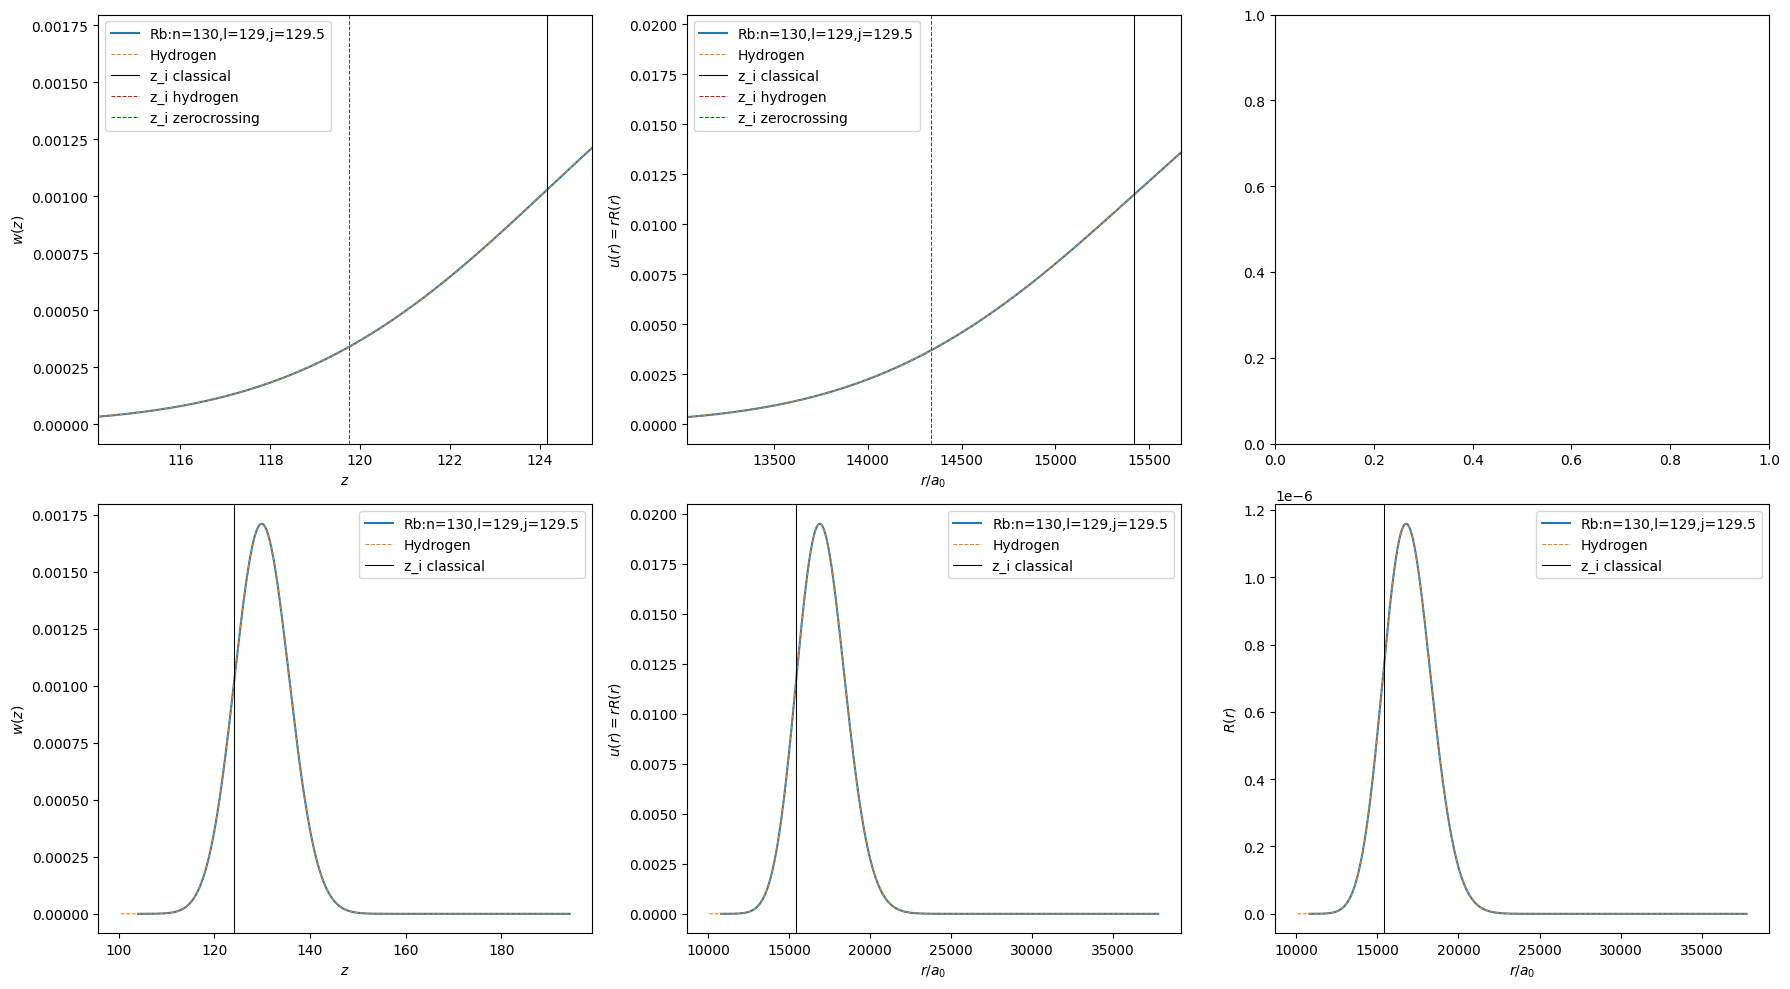

In [5]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
z_i = {which: atom.model.calc_z_turning_point(which, dz=1e-3) for which in ["hydrogen", "classical", "zerocrossing"]}
print("turning points: ", z_i)

axs[0, 0].plot(atom.grid.zlist, atom.wavefunction.wlist, "C0-", label=label)
axs[0, 0].plot(hydrogen.grid.zlist, hydrogen.wavefunction.wlist, "C1--", lw=0.75, label="Hydrogen")
axs[0, 0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[0, 0].axvline(z_i["hydrogen"], color="red", ls="--", lw=0.75, label="z_i hydrogen")
axs[0, 0].axvline(z_i["zerocrossing"], color="green", ls="--", lw=0.75, label="z_i zerocrossing")
axs[0, 0].set_xlabel(r"$z$")
axs[0, 0].set_ylabel(r"$w(z)$")
axs[0, 0].legend()
zmin, zmax = max(0, z_i["classical"] - 10), z_i["classical"] + 1
axs[0, 0].set_xlim(zmin, zmax)

axs[0, 1].plot(atom.grid.xlist, atom.wavefunction.ulist, "C0-", label=label)
axs[0, 1].plot(hydrogen.grid.xlist, hydrogen.wavefunction.ulist, "C1--", lw=0.75, label="Hydrogen")
axs[0, 1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[0, 1].axvline(z_i["hydrogen"] ** 2, color="red", ls="--", lw=0.75, label="z_i hydrogen")
axs[0, 1].axvline(z_i["zerocrossing"] ** 2, color="green", ls="--", lw=0.75, label="z_i zerocrossing")
axs[0, 1].set_xlabel(r"$r / a_0$")
axs[0, 1].set_ylabel(r"$u(r) = r R(r)$")
axs[0, 1].legend()
axs[0, 1].set_xlim(zmin**2, zmax**2)

axs[1, 0].plot(atom.grid.zlist, atom.wavefunction.wlist, "C0-", label=label)
axs[1, 0].plot(hydrogen.grid.zlist, hydrogen.wavefunction.wlist, "C1--", lw=0.75, label="Hydrogen")
axs[1, 0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 0].set_xlabel(r"$z$")
axs[1, 0].set_ylabel(r"$w(z)$")
axs[1, 0].legend()

axs[1, 1].plot(atom.grid.xlist, atom.wavefunction.ulist, "C0-", label=label)
axs[1, 1].plot(hydrogen.grid.xlist, hydrogen.wavefunction.ulist, "C1--", lw=0.75, label="Hydrogen")
axs[1, 1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 1].set_xlabel(r"$r / a_0$")
axs[1, 1].set_ylabel(r"$u(r) = r R(r)$")
axs[1, 1].legend()

axs[1, 2].plot(atom.grid.xlist, atom.wavefunction.Rlist, "C0-", label=label)
axs[1, 2].plot(hydrogen.grid.xlist, hydrogen.wavefunction.Rlist, "C1--", lw=0.75, label="Hydrogen")
axs[1, 2].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1, 2].set_xlabel(r"$r / a_0$")
axs[1, 2].set_ylabel(r"$R(r)$")
axs[1, 2].legend()

fig.tight_layout()
plt.show()

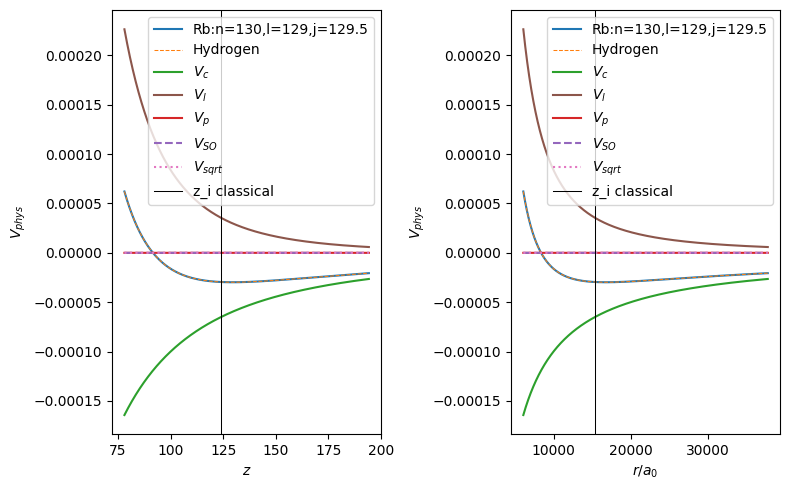

Rb energy: -2.9585607212803095e-05
Hydrogen energy: -2.9585798816568047e-05


In [6]:
plot_all_potentials = True

label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
new_z_list = np.linspace(0.75 * np.sqrt(atom.grid.xmin), np.sqrt(atom.grid.xmax), 10_000)
new_x_list = np.power(new_z_list, 2)
atom_V_phys = atom.model.calc_V_phys(new_x_list)
hydrogen_V_phys = hydrogen.model.calc_V_phys(new_x_list)

axs[0].plot(new_z_list, atom_V_phys, "C0-", label=label)
axs[0].plot(new_z_list, hydrogen_V_phys, "C1--", lw=0.75, label="Hydrogen")

if plot_all_potentials:
    axs[0].plot(new_z_list, atom.model.calc_V_c(new_x_list), "C2-", label=r"$V_c$")
    axs[0].plot(new_z_list, atom.model.calc_V_l(new_x_list), "C5-", label=r"$V_l$")
    axs[0].plot(new_z_list, atom.model.calc_V_p(new_x_list), "C3-", label=r"$V_p$")
    axs[0].plot(new_z_list, atom.model.calc_V_so(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[0].plot(new_z_list, atom.model.calc_V_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[0].axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$V_{phys}$")
axs[0].legend()

axs[1].plot(new_x_list, atom_V_phys, "C0-", label=label)
axs[1].plot(new_x_list, hydrogen_V_phys, "C1--", lw=0.75, label="Hydrogen")

if plot_all_potentials:
    axs[1].plot(new_x_list, atom.model.calc_V_c(new_x_list), "C2-", label=r"$V_c$")
    axs[1].plot(new_x_list, atom.model.calc_V_l(new_x_list), "C5-", label=r"$V_l$")
    axs[1].plot(new_x_list, atom.model.calc_V_p(new_x_list), "C3-", label=r"$V_p$")
    axs[1].plot(new_x_list, atom.model.calc_V_so(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[1].plot(new_x_list, atom.model.calc_V_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[1].axvline(z_i["classical"] ** 2, color="k", ls="-", lw=0.75, label="z_i classical")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$V_{phys}$")
axs[1].legend()


for ax in axs:
    if ax.get_ylim()[0] < -0.1:
        ax.set_ylim(-0.1)
    if ax.get_ylim()[1] > 0.1:
        ax.set_ylim(None, 0.1)

fig.tight_layout()
plt.show()

print(f"{atom.species} energy: {atom.energy}")
print(f"Hydrogen energy: {hydrogen.energy}")

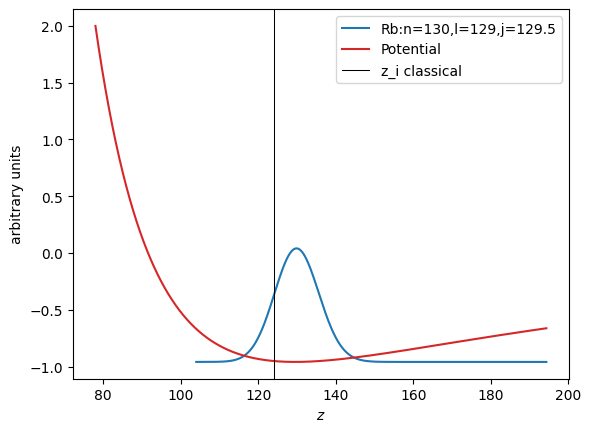

In [7]:
scaled_wlist = atom.wavefunction.wlist / np.max(np.abs(atom.wavefunction.wlist))
scaled_V_phys = 2 * atom_V_phys / np.max(np.abs(atom_V_phys))

fig, ax = plt.subplots()

ax.plot(atom.grid.zlist, scaled_wlist + np.min(scaled_V_phys), "C0-", label=label)
ax.plot(new_z_list, scaled_V_phys, "C3-", label="Potential")
ax.set_xlabel(r"$z$")
ax.set_ylabel("arbitrary units")

ax.axvline(z_i["classical"], color="k", ls="-", lw=0.75, label="z_i classical")
ax.legend()
plt.show()